In [9]:
import pandas as pd

df = pd.read_csv('my_project_1.tab', skiprows=13, header=None, delim_whitespace=True, names = ['rho','vp','vs'])

#rhos = df.rho.tolist()

In [10]:
import subprocess
def cut_value_from_line(lineno=5):
    output = subprocess.check_output("sed -n -e %sp *.tab" % lineno, shell=True)
    return float(str(output).strip("\\n'").strip("b'").strip())

p1=cut_value_from_line(5)
dp=cut_value_from_line(6)
np=int(cut_value_from_line(7))

t1=cut_value_from_line(9)
dt=cut_value_from_line(10)
nt=int(cut_value_from_line(11))


from numpy import arange
ps = arange(np)*dp + p1
ts = arange(nt)*dt + t1 - 273.15

In [11]:
from numpy import array, nan

rhos = array(df.rho.tolist()).reshape(nt,np)
vps = array(df.vp.tolist()).reshape(nt,np)
vss = array(df.vs.tolist()).reshape(nt,np)

rhos[rhos<10] = nan
vps[vps>20]   = nan
vss[vss>20]   = nan


In [12]:
!head -n 20 *.tab

|6.6.6
my_project_1.tab                                                                                    
           2
P(bar)  
   10.000000000000000     
   1515.0505050505051     
         100
T(K)    
   800.00000000000000     
   14.141414141414142     
         100
           3
rho,kg/m3      vp,km/s        vs,km/s       
  3250.94        7.70863        4.52707     
  3255.92        7.75593        4.53139     
  3288.35        7.85847        4.56008     
  3292.97        7.87705        4.56474     
  3297.55        7.89540        4.56935     
  3302.10        7.91353        4.57391     
  3306.62        7.93145        4.57842     


In [13]:
!ln -sf ../conversions .
from conversions import pressure
zs = pressure.PtoZ(ps*10e-5)

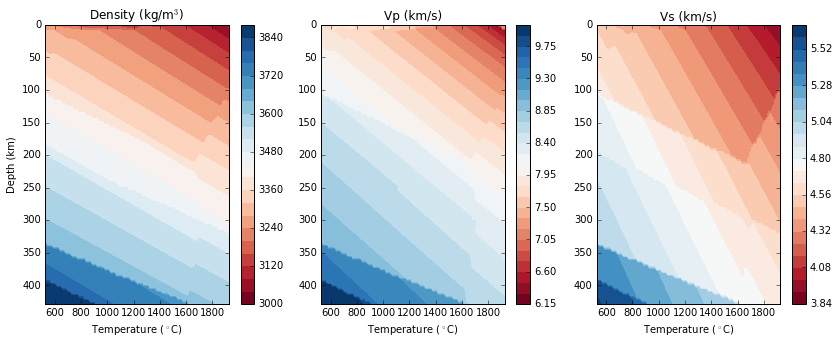

In [14]:
from matplotlib import pylab as plt
%matplotlib inline

plt.figure(1,(14,5))

#plt.imshow(rhos.T,vmin=3000,vmax=4000,origin='upper',cmap='RdBu_r', extent= [min(ps),t2,p1,p2],aspect='auto')

titles = ['Density (kg/m$^3$)','Vp (km/s)',"Vs (km/s)"]

for ii,array in enumerate([rhos, vps, vss]):
    _ = plt.figure(1)
    _ = plt.subplot(1,3,ii+1)
    _ = plt.contourf(ts,zs,array.T,25,cmap='RdBu')
    _ = plt.colorbar()
    plt.title(titles[ii])
    plt.ylim(max(zs),0)
    if ii == 0:
        _ = plt.ylabel('Depth (km)')
    _ = plt.xlabel('Temperature ($^\circ$C)')

In [15]:
from scipy.interpolate import interp2d

frho=interp2d(ts,zs,rhos.T / 1000.0)
fvp =interp2d(ts,zs,vps.T)
fvs =interp2d(ts,zs,vss.T)

In [17]:
import pickle
funs = [frho,fvp,fvs]
fout = open('funs.pickle','wb')
pickle.dump(funs, fout)
fout.close()
!ls -lth funs.pickle

-rw-r--r--  1 mancinelli  staff   480K Jun  9 20:37 funs.pickle
